# Random Forest Classification
-----

<div class="table-of-contents" style="background-color:#433878; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
    <p><a class='anchor' id='top' style="color: #EEEEEE">Table of contents:</a></p>
  <ul>
    <li style="color: #493628"><a href="#1" style="color: #EEEEEE">Importing the libraries </a></li>
    <li style="color: #493628"><a href="#2" style="color: #EEEEEE">Importing the dataset</a></li>
    <li style="color: #493628"><a href="#3" style="color: #EEEEEE">Data analysis</a></li>
    <li style="color: #493628"><a href="#4" style="color: #EEEEEE">Split the dataset into dependent/independent variables</a></li>
    <li style="color: #493628"><a href="#5" style="color: #EEEEEE">Data Preprocessing</a></li>
    <li style="color: #493628"><a href="#6" style="color: #EEEEEE">Spliting the dataset into thetraining set and test set</a></li> 
    <li style="color: #493628"><a href="#7" style="color: #EEEEEE">Training the Random Forest Classification model on training set</a></li>
    <li style="color: #493628"><a href="#8" style="color: #EEEEEE">Predicting The Test set results</a></li>  
    <li style="color: #493628"><a href="#9" style="color: #EEEEEE">Visualsing the Training set results</a></li>  
    <li style="color: #493628"><a href="#10" style="color: #EEEEEE">model evaluation</a></li>
    <li style="color: #493628"><a href="#11" style="color: #EEEEEE">Plotting the Confusion Matrix for Classification Results</a></li>    
    <li style="color: #493628"><a href="#12" style="color: #EEEEEE">Calculating and Printing the Accuracy Score</a></li>  
    <li style="color: #493628"><a href="#13" style="color: #EEEEEE">Sources</a></li>  
  </ul>
</div>


## Step 1: <span id="1" style="color: #4A628A">Importing the libraries 📚 </span>[🔝](#top)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### For hide all warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 2: <span id="2" style="color: #4A628A">Importing the dataset 📥 </span>[🔝](#top)

In [3]:
dataset = pd.read_csv("ParisHousingClass.csv")

### Data Shape and information

In [4]:
print (f"Shape of data {dataset.shape}")
print (f"Number of rows: {dataset.shape [0]}")
print (f"Number of columns: {dataset.shape [1]}")

Shape of data (10000, 18)
Number of rows: 10000
Number of columns: 18


In [5]:
dataset.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [6]:
dataset.tail()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic
9999,1440,84,0,0,49,18412,6,10,1994,1,0,8485,2024,278,1,6,146708.4,Basic


In [8]:
dataset["category"].unique()

array(['Basic', 'Luxury'], dtype=object)

## Step 3: <span id="3" style="color: #4A628A">Data analysis ⚙️ </span>[🔝](#top)

In [9]:
# To analyze descriptive statistics of data
dataset.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [11]:
dataset.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

## Step 4: <span id="4" style="color: #4A628A">Split the dataset into dependent/independent variables ✂️ </span>[🔝](#top)

In [12]:
# independent variables
x = dataset.iloc[:,0:-1].values
# dependent variables
y = dataset.iloc[:,-1].values

y = y.reshape(len(y),1)

## Step 5: <span id="5" style="color: #4A628A">Data Preprocessing ✨</span>[🔝](#top)

### the most commonly used techniques:

1. Label Encoding:

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
encoded_data = onehot_encoder.fit_transform(y.reshape(-1, 1))


2. One-Hot Encoding:

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)

> I will choose the second way

In [15]:
encoded_y

array([0, 1, 0, ..., 0, 0, 0])

## Step 6: <span id="6" style="color: #4A628A">Spliting the dataset into thetraining set and test set 🗃️ </span>[🔝](#top)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,encoded_y,test_size=0.2,
                                                   random_state=0)

## Step 7: <span id="7" style="color: #4A628A">Training the Random Forest Classification model on training set 🛠️ </span>[🔝](#top)

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

## Step 8: <span id="8" style="color: #4A628A">Predicting The Test set results 🎯 </span>[🔝](#top)

In [19]:
y_pred = classifier.predict(x_test)

In [20]:
df = pd.DataFrame({'Real Values':y_test.flatten().tolist(), 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1995,0,0
1996,0,0
1997,0,0
1998,0,0


## Step 9: <span id="9" style="color: #4A628A">Visualsing the Training set results 📊 </span>[🔝](#top)

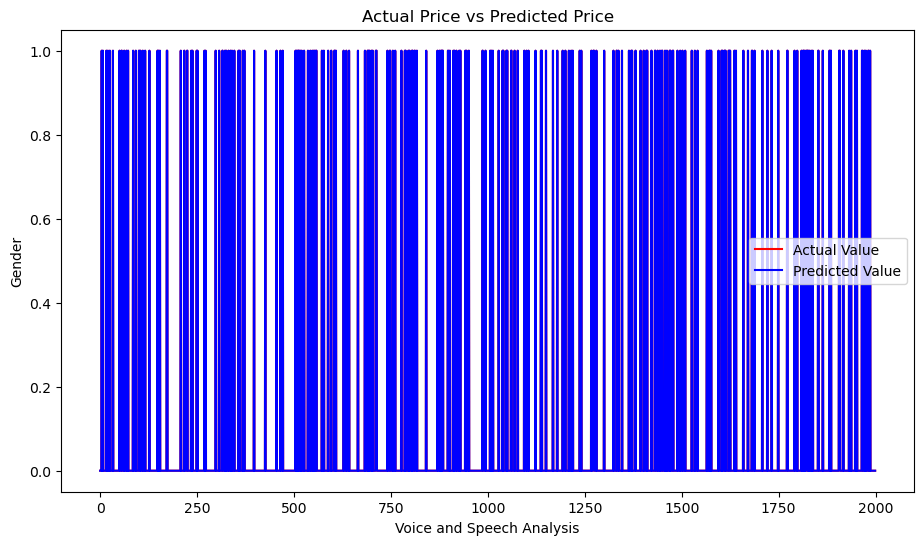

In [21]:
plt.figure(figsize=(11, 6))
plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(y_pred, color='blue', label='Predicted Value')

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Voice and Speech Analysis')
plt.ylabel('Gender')
plt.legend()
plt.show()

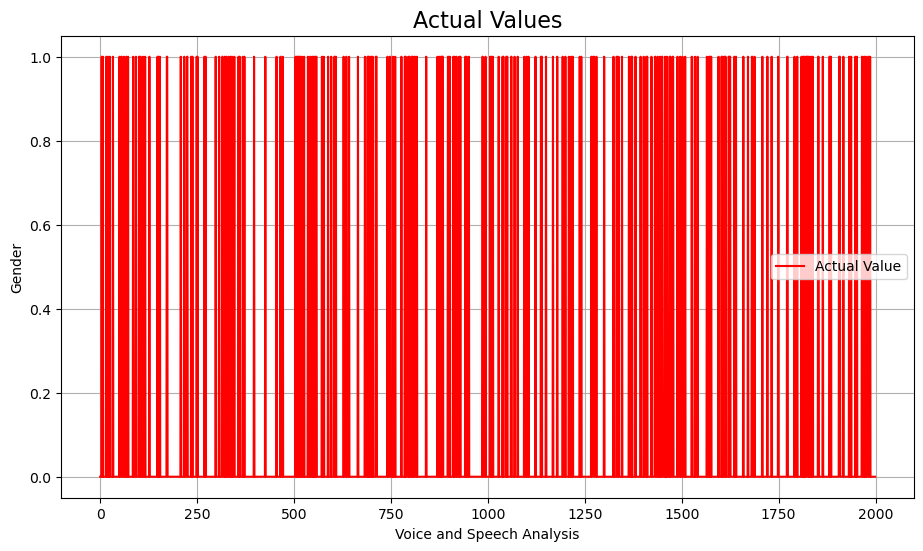

In [22]:
# Plot for Actual Values
plt.figure(figsize=(11, 6))
plt.plot(y_test, color='red', label = 'Actual Value')
plt.title('Actual Values', fontsize=16)
plt.xlabel('Voice and Speech Analysis')
plt.ylabel('Gender')
plt.legend()
plt.grid(True)
plt.show()

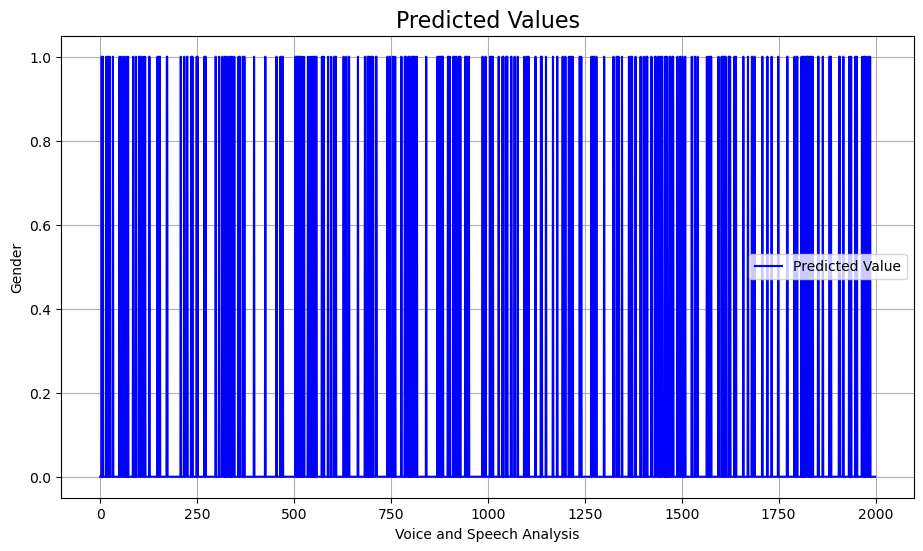

In [23]:
# Plot for Predicted Values
plt.figure(figsize=(11, 6))
plt.plot(y_pred, color='blue', label='Predicted Value')
plt.title('Predicted Values', fontsize=16)
plt.xlabel('Voice and Speech Analysis')
plt.ylabel('Gender')
plt.legend()
plt.grid(True)
plt.show()

## Step 10: <span id="10" style="color: #4A628A">model evaluation ⚡ </span>[🔝](#top)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
print('mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 

mean_squared_error :  0.0
mean_absolute_error :  0.0


## Step 11: <span id="11" style="color: #4A628A">Plotting the Confusion Matrix for Classification Results 🌟 </span>[🔝](#top)

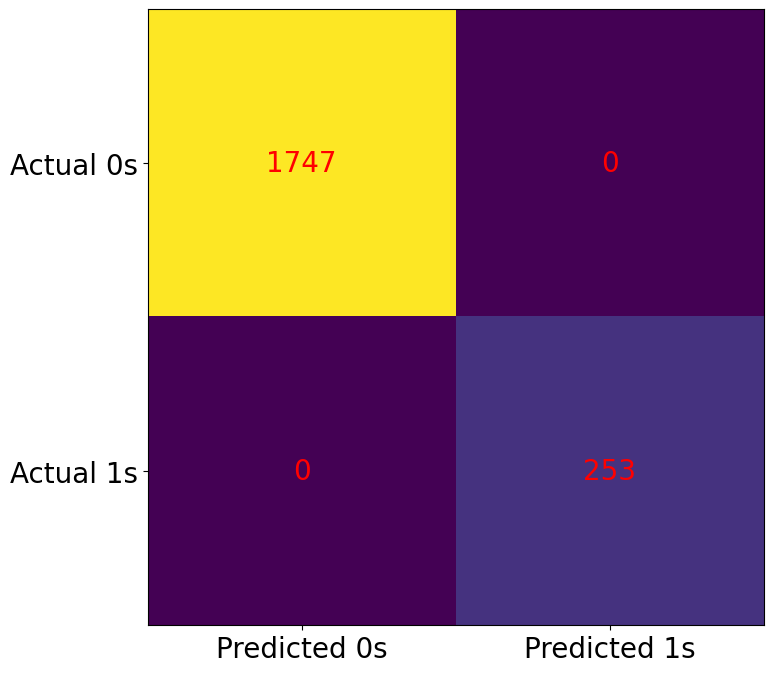

In [25]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test , y_pred)

# Create figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_matrix)
ax.grid(False)

# Set labels for the axes
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))

# Customize the tick label font size
ax.tick_params(axis='both', which='major', labelsize=20)

# Set limits for the vertical axis
ax.set_ylim(1.5, -0.5)

# Add text annotations in each cell of the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="red", fontsize=20)

plt.show()

## Step 12: <span id="12" style="color: #4A628A">Calculating and Printing the Accuracy Score 🚀 </span>[🔝](#top)

In [26]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

1.0


## <a id="13">Sources 📝</a>:<a class='anchor' id='images'></a> [🔝](#top)
----
- scikit-learn.org : https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- kaggle : https://www.kaggle.com/datasets/mssmartypants/paris-housing-classification
- Machine Learning A-Z: AI, Python & R + ChatGPT Prize [2024] : https://www.udemy.com/course/machinelearning/?couponCode=2021PM20